## Lab3 Assignment


In [45]:
# importing libraries
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error



### Loading the diabetes dataset using sklearn


In [3]:
from sklearn import datasets
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)


In [8]:
#checking data
##IMPORTING THE DATA
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
print("Size of X :",diabetes_X.shape, "\nSize of y :",diabetes_y.shape)


Size of X : (442, 10) 
Size of y : (442,)


In [17]:
# adding column name to data

diabetes_X = pd.DataFrame(diabetes_X)
diabetes_X.columns =['age','sex','bmi','average_blood_pressure','s1','s2','s3','s4','s5','s6']

diabetes_y = pd.DataFrame(diabetes_y)
diabetes_y.columns = ["disease_progression_yearly"]

In [11]:
diabetes_X.describe()

,age,sex,bmi,average_blood_pressure,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


### spliting dataset into training and testing set

In [18]:
diabetes_y.describe()

,disease_progression_yearly
count,442.000000
mean,152.133484
std,77.093005
min,25.000000
25%,87.000000
50%,140.500000
75%,211.500000
max,346.000000


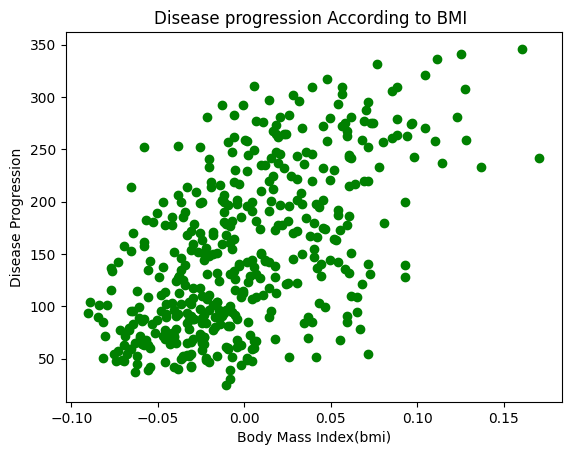

In [21]:
plt.scatter(diabetes_X["bmi"],diabetes_y["disease_progression_yearly"],color='green')                      
plt.xlabel("Body Mass Index(bmi)")
plt.ylabel("Disease Progression")
plt.title("Disease progression According to BMI ")
plt.show()

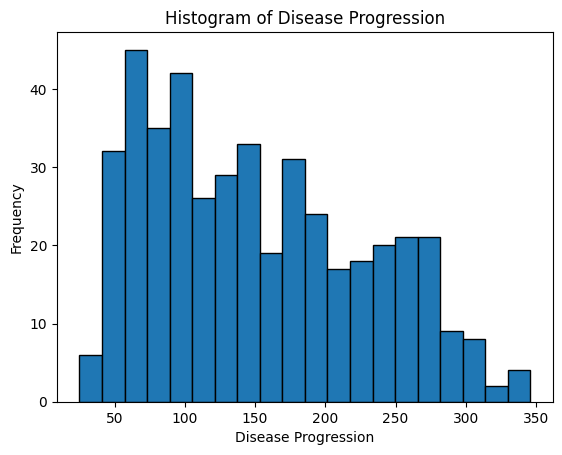

In [25]:
# Histogram of Disease Progression
plt.hist(diabetes_y['disease_progression_yearly'], bins=20, edgecolor='black')
plt.xlabel('Disease Progression')
plt.ylabel('Frequency')
plt.title('Histogram of Disease Progression')
plt.show()

In [27]:
diabetes = pd.DataFrame(diabetes_X,columns = ['age','sex','bmi','average_blood_pressure','s1','s2','s3','s4','s5','s6'])

diabetes["disease_progression_yearly"] = pd.DataFrame(diabetes_y)

X = diabetes[['bmi']]
y = diabetes[["disease_progression_yearly"]]


In [28]:
print(X)
print(y)

          bmi
0    0.061696
1   -0.051474
2    0.044451
3   -0.011595
4   -0.036385
..        ...
437  0.019662
438 -0.015906
439 -0.015906
440  0.039062
441 -0.073030

[442 rows x 1 columns]
     disease_progression_yearly
0                         151.0
1                          75.0
2                         141.0
3                         206.0
4                         135.0
..                          ...
437                       178.0
438                       104.0
439                       132.0
440                       220.0
441                        57.0

[442 rows x 1 columns]


### fitting the linear regression model

In [29]:
#spliting the data set into training and testing set of 80-20%
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=22)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(309, 1)
(133, 1)
(309, 1)
(133, 1)


In [30]:
#training a linear regression model
model = LinearRegression()  

model.fit(X_train, y_train)

LinearRegression()

In [31]:
# coefficient of the model
print(f"The model coefficient for the model is {model.coef_}")
print(f"The intercept of the model is {model.intercept_}")

The model coefficient for the model is [[988.41931249]]
The intercept of the model is [151.04202449]


In [34]:
# Make predictions on the training and test data
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [48]:
# Calculate mean squared error on training and test data

MSE_train_loss = mean_squared_error(y_train_pred,y_train)
MSE_test_loss = mean_squared_error(y_test_pred,y_test)

MAE_train_loss = mean_absolute_error(y_train_pred,y_train)
MAE_test_loss = mean_absolute_error(y_test_pred,y_test)


print(f"MSE of train loss : {MSE_train_loss}, MSE test loss : {MSE_test_loss}")

print(f"MAE of train loss : {MAE_train_loss},MAE test loss : {MAE_test_loss}")

#print("train loss ->>",train_loss,"")

MSE of train loss : 3899.45479231627, MSE test loss : 3884.936720961032
MAE of train loss : 51.95119946335585,MAE test loss : 50.59307504375872


Text(0, 0.5, 'Disease progress')

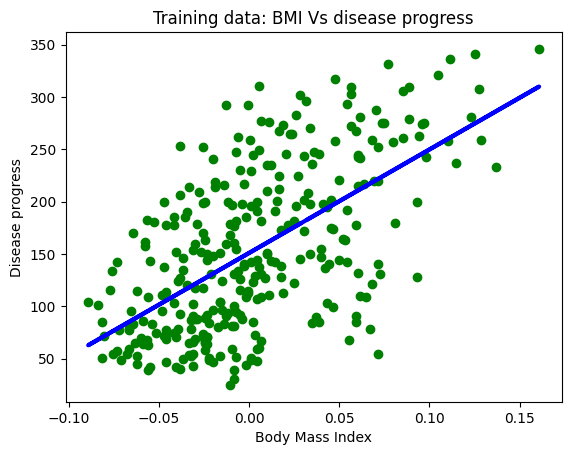

In [42]:
# Plot the regression (model) line vs actual data points
plt.scatter(X_train,y_train,color = 'green',label = "Training_data")
plt.plot(X_train,y_train_pred,color = "blue",linewidth=3,label = "Prediction Line")
plt.title("Training data: BMI Vs disease progress")
plt.xlabel('Body Mass Index')
plt.ylabel('Disease progress')

Text(0, 0.5, 'Disease Progression yearly')

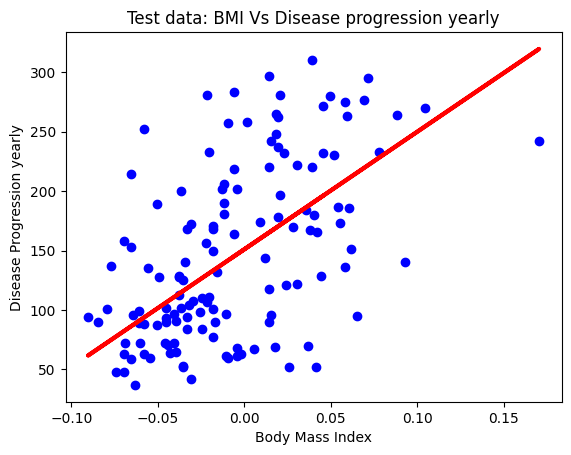

In [50]:
plt.scatter(X_test,y_test,color = 'blue',label = "Training_data")
plt.plot(X_test,y_test_pred,color = "red",linewidth=3,label = "Prediction Line")
plt.title("Test data: BMI Vs Disease progression yearly")
plt.xlabel('Body Mass Index')
plt.ylabel('Disease Progression yearly')

In [51]:
accuracy_model = model.score(X,y)
print(f"Accuracy of the model : {accuracy_model}")


Accuracy of the model : 0.3431430288953802


#### Mean Squared Error (MSE) on  training and testing data are 3899.454 and 3884.936 respectively, which is large so model cannot be called best fit one

#### Since our model accuracy is 0,3431 or 34.31 our model is not best fit for the given data.